In [2]:
import torch
import matplotlib.pyplot as plt
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = "cpu"
print('Using device:', device)
print()

model_name = "GP"

Using device: cpu



In [3]:
for region_name in ["regionc"]:

    print(f"\nTraining for {region_name.upper()}...")

    # Store metrics for the current simulation
    region_results = []

    #########################
    ### x_train & y_train ###
    #########################

    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    train = torch.load(path_to_training_tensor, weights_only = False).T # we need to transpose the tensor to have observations in the first dimension
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # The train and test tensors have the following columns:
    # [:, 0] = x
    # [:, 1] = y
    # [:, 2] = surface elevation (s)
    # [:, 3] = ice flux in x direction (u)
    # [:, 4] = ice flux in y direction (v)
    # [:, 5] = ice flux error in x direction (u_err)
    # [:, 6] = ice flux error in y direction (v_err)

    x_train = train[:, [0, 1]].to(device).cpu()
    y_train = train[:, [3, 4]].to(device).cpu()

    x_test = test[:, [0, 1]].to(device).cpu()
    y_test = test[:, [3, 4]].to(device).cpu()


Training for REGIONC...


In [4]:
path_to_y_test_prediction = "results_byrd/" + model_name + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"

y_test_prediction = torch.load(path_to_y_test_prediction, weights_only = False).to(device).detach().cpu()

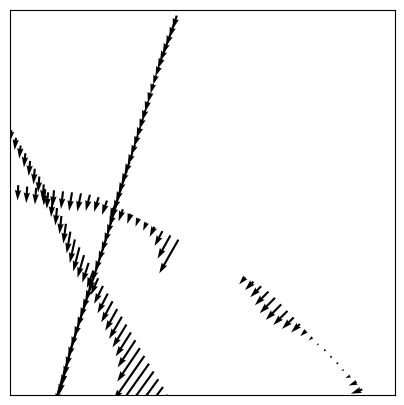

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    
# Plot ground truth test data in black
ax.quiver(x_test[:, 0], x_test[:, 1], y_test_prediction[:, 0], y_test_prediction[:, 1], color = "black")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
    
ax.set_aspect("equal")

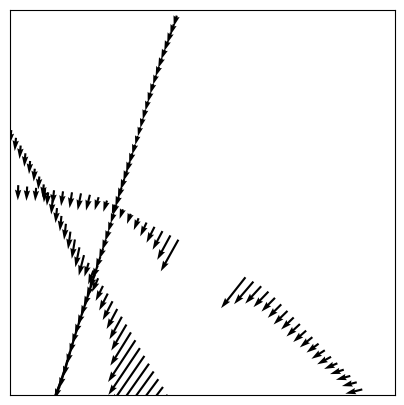

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    
# Plot ground truth test data in black
ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
    
ax.set_aspect("equal")

In [7]:
(y_test - y_test_prediction).square().mean().sqrt()

tensor(0.4573)